# Prerequisites

- Lattice theory
- Vector spaces

# Theory

## Vector projection

https://en.wikipedia.org/wiki/Vector_projection

$a_1$ is a projection of $a$ on $b$
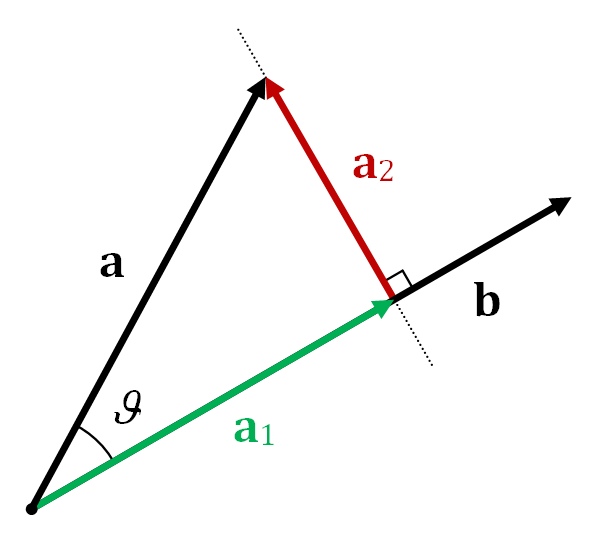

**Scalar projection** 
- $\alpha_1 =  \dfrac {a \cdot b} {\|b\|}$ = scalar. We use this to scale the projection

**Vector projection**
- $a_1 = \alpha_1 \cdot \hat{b}$ where $\hat{b} = \dfrac 1 {\|b\|} b$ is the unit vector. The unit vector gives the direction of $b$

Therefore $a_1 = \underbrace{ \cfrac {a \cdot b} {\|b\|} }_{\text{scalar}} \underbrace{ \cdot \cfrac 1 {\|b\|} }_{\text{scalar}} \underbrace{b}_{\text{vector}} = \dfrac {a \cdot b} {\|b\|^2}b$


## GCD

The euclidean algorithm is just a lattice reduction in $\mathbb{R}$



## Gaussian lattice reduction

Let
-  $\mathcal{L} \subset \mathbb{R}^2$ 
- $v_1, v_2 \in \mathcal{L}$, be a basis with $\|v_1\| < \|v_2\|$ 
- Let $\mu_{2,1} = \cfrac{v_1 \cdot v_2}{\|v_1\|^2}$

*Stop Conditions*
- $\begin{cases}
\|v_1\| < \|v_2\| \\
\|v_2\| < \|v_1 + v_2\| \text{ Addition won't change } v_2
\end{cases} \iff
\begin{cases}
\|v_1\|^2 < \|v_2^*\|^2 + \mu^2\|v_1\|^2 \\
|\mu| \leq \dfrac 1 2
\end{cases} $ 

**Algorithm**
- while $\lfloor \mu_{2,1} \rceil \neq 0$
    - if $\|v_1\| > \|v_2\|$ swap them
    - $\mu_{2,1} = \cfrac{v_1 \cdot v_2}{\|v_1\|^2}$
    - $v_2 = v_2 - \lfloor \mu_{2,1} \rceil v_1$ #Projection
    
    
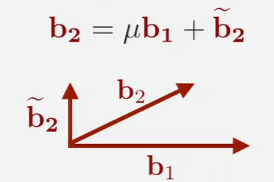

In [3]:
v1= vector([66586820,65354729])
v2= vector([6513996,6393464])

In [8]:
def glr(v1, v2):
    mu = -2
    while round(mu):
        if v1.norm() > v2.norm():
            v1, v2 = v2, v1
        mu = v1 * v2 / (v1.norm()**2)
        v2 = v2 - round(mu) * v1
    return v1, v2

In [9]:
glr(v1, v2)

((2280, -1001), (-1324, -2376))

## Gram schmidt

- https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process

> Let $\mathcal{B} = \{v_1, v_2, ... , v_n\}$ be a basis for a space  
> An orthogonal basis $\mathcal{B^*} = \{v_1^*, v_2^*, ... , v_n^*\}$ is a basis where all the vectors are pairwise orthogonal


## LLL

Given a basis $\mathcal{B} = \{v_1, v_2, ... , v_n\}$ we want to find a "better" basis. What does "better" mean?
* short vectors
* as orthogonal as possible

Let $\mathcal{B}^* = \{v^∗_1,v^∗_2,...,v^∗_n\} = $ basis for $span(\mathcal{B})$ constructed using Gram Schmidt

**Property**  
$\det(\mathcal{L}) = \det(F) = \det(F^*) = {\prod^n_{i=1}||v_i^*||}$

**LLL Reduced**
> $\mathcal{B}$ is  LLL reduced $\iff$
> - Size condition $|\mu_{i,j}| = \cfrac{|v_i \cdot v_i^*|} {\|v_j^*\|^2} \leq \cfrac 1 2 $ for all $1 \leq j < i \leq n$
> - Lovasz Condition $||v^*_i||^2 \geq \left(\delta - \mu^2_{i, i-1} \right)||v_{i-1}^*||^2$ for all $1 < i \leq n \iff ||Proj_{span(v_1,...v_{i-2})^\perp}(v_i)|| \geq \delta ||Proj_{span(v_1,...v_{i-2})^\perp} (v_{i-1})||$ 

intuition for lovasz condition: https://crypto.stackexchange.com/questions/39532/why-is-the-lov%C3%A1sz-condition-used-in-the-lll-algorithm

**Theorem**
Let $\mathcal{L}$ = lattice, $\dim(\mathcal{L}) = n$. Any LLL reduced basis $\{v_1,v_2,...,v_n\}$ for $\mathcal{L}$ has the following two properties:
* $\prod^n_{i=1}\|v_i\| \leq 2^{n(n-1)/4} \cdot \det(\mathcal{L})$
* $\|v_j\| \leq 2^{(i-1)/2}\|v_i^*\|$ for all $1 \leq j \leq i \leq n$

Further
* $\|v_1\| \leq 2^{(n-1)/4} |\det \mathcal{L}|^{1/n}$
* $\|v_1\| \leq 2^{(n-1)/2} \underset{0 \neq v \in L}{\min}||v|| \Rightarrow$  LLL sovles apprSVP within $2^{(n-1)/2}$

LLL algorithm intuition: https://kel.bz/post/lll/

algorithm implemented after this: https://en.wikipedia.org/wiki/Lenstra%E2%80%93Lenstra%E2%80%93Lov%C3%A1sz_lattice_basis_reduction_algorithm

*Algorithm details*  

- The goal of LLL is to produce a list of short vectors in increasing order oflength. For each $1≤l≤n$,let $\mathcal{L}_l$ denote the lattice spanned by $v_1,...,v_l$.  
- What LLL attempts to do is to find an ordering of the basis vectors (combined with size reductions whenever possible) that minimizes the determinants $\det(\mathcal{L}_l)$   
- If the  $\delta = \dfrac 3 4$  is replaced by $\delta=1$, then the LLL algorithm does precisely this; it swaps $v_k$ and $v_{k−1}$ whenever doing so reduces the value of det $L_{k−1}$. Unfortunately, if we use $\delta = 1$ instead of $\delta = \dfrac 3 4$, then it is an open problem whether the LLL algorithm terminates in polynomial time

## Resources

- https://youtu.be/o4Pl-0Q5-q0?list=PLgKuh-lKre10rqiTYqJi6P4UlBRMQtPn0&t=2410